In [1]:
import io
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%cd "D:\Imarticus\Hackathons\Oct 2023(imarticus)\House Grade Prediction"

D:\Imarticus\Hackathons\Oct 2023(imarticus)\House Grade Prediction


In [2]:
grade_tr=pd.read_csv("TRAINING_.csv")

In [3]:
grade_tt=pd.read_csv("TEST_.csv")

In [4]:
grade_tr.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [5]:
grade_tr.tail()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
6995,6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717$
6996,6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339$
6997,6998,306,6.0,4.0,2.0,4.0,yes,83.0,80.0,4,96.0,4,D,3829$
6998,6999,338,8.0,7.0,6.0,7.0,NO,0.0,95.0,4,84.0,1,B,4488$
6999,7000,314,5.0,6.0,4.0,6.0,yes,109.0,80.0,4,96.0,2,C,3418$


In [6]:
grade_tr.shape

(7000, 14)

In [7]:
grade_tr.describe()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,7000.000000,7000.000000,6998.000000,6997.000000,6998.000000,6999.000000,5647.000000,6998.000000,7000.000000,6999.000000,7000.000000
mean,3500.500000,325.225571,7.012146,4.992568,4.004716,5.501357,47.202763,89.957988,4.509429,78.975711,3.494714
std,2020.870275,20.550583,1.420061,1.653418,1.596984,1.509129,48.806472,11.812719,1.831187,11.852443,1.700449
min,1.000000,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,1750.750000,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,3500.500000,326.000000,7.000000,5.000000,4.000000,5.000000,0.000000,90.000000,5.000000,79.000000,3.000000
75%,5250.250000,343.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000
max,7000.000000,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


In [8]:
grade_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [9]:
grade_tt.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [10]:
grade_tt.tail()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
3294,3295,349,7.0,3.0,3.0,4,NaN,NaN,100.0,5,89.0,4,3858$
3295,3296,338,7.0,3.0,2.0,4,NO,0.0,87.0,3,75.0,6,3714$
3296,3297,307,8.0,4.0,5.0,6,yes,88.0,88.0,4,83.0,6,3824$
3297,3298,352,5.0,3.0,4.0,5,YES,88.0,100.0,2,99.0,4,3533$
3298,3299,329,5.0,3.0,1.0,3,yes,82.0,83.0,3,97.0,5,3404$


In [11]:
grade_tt.shape

(3299, 13)

In [12]:
grade_tt.describe()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,3299.000000,3299.000000,3298.000000,3298.000000,3298.000000,3299.000000,2646.000000,3298.000000,3299.000000,3298.000000,3299.000000
mean,1650.000000,324.530464,6.982110,5.001516,4.006367,5.501667,47.267196,90.130079,4.507123,79.142207,3.493483
std,952.483596,20.329783,1.419773,1.625266,1.547437,1.467532,48.943608,11.849568,1.780613,11.812589,1.696732
min,1.000000,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,825.500000,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,1650.000000,324.000000,7.000000,5.000000,4.000000,6.000000,0.000000,90.000000,5.000000,79.000000,3.000000
75%,2474.500000,342.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000
max,3299.000000,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


In [13]:
grade_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3298 non-null   float64
 3   Nbedrooms    3298 non-null   float64
 4   Nbwashrooms  3298 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         2646 non-null   object 
 7   Roof(Area)   2646 non-null   float64
 8   Lawn(Area)   3298 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3298 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 335.2+ KB


In [14]:
grade_tt['Grade']='Missing'

In [15]:
grade_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3298 non-null   float64
 3   Nbedrooms    3298 non-null   float64
 4   Nbwashrooms  3298 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         2646 non-null   object 
 7   Roof(Area)   2646 non-null   float64
 8   Lawn(Area)   3298 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3298 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
 13  Grade        3299 non-null   object 
dtypes: float64(6), int64(5), object(3)
memory usage: 361.0+ KB


In [16]:
combine_df=pd.concat([grade_tr,grade_tt],axis=0,ignore_index=True)

In [17]:
combine_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [18]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10296 non-null  float64
 3   Nbedrooms    10295 non-null  float64
 4   Nbwashrooms  10296 non-null  float64
 5   Twashrooms   10298 non-null  float64
 6   roof         8293 non-null   object 
 7   Roof(Area)   8293 non-null   float64
 8   Lawn(Area)   10296 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10297 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 1.1+ MB


In [19]:
combine_df.isnull().sum()

id                0
Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [20]:
combine_df.Troom.value_counts(dropna=False)

Troom
9.0    2095
5.0    2081
7.0    2066
6.0    2028
8.0    2026
NaN       3
Name: count, dtype: int64

In [21]:
combine_df.Troom=combine_df.Troom.fillna(9.0)

In [22]:
combine_df.Nbedrooms.value_counts(dropna=False)

Nbedrooms
4.0    2037
6.0    2029
5.0    2023
3.0    1416
7.0    1401
2.0     696
8.0     693
NaN       4
Name: count, dtype: int64

In [23]:
combine_df.Nbedrooms=combine_df.Nbedrooms.fillna(4.0)

In [24]:
combine_df.Twashrooms.value_counts(dropna=False)

Twashrooms
4.0    2113
6.0    2078
7.0    2069
5.0    2021
8.0    1019
3.0     998
NaN       1
Name: count, dtype: int64

In [25]:
combine_df.Twashrooms=combine_df.Twashrooms.fillna(4.0)

In [26]:
combine_df.roof.value_counts(dropna=False)

roof
no     2100
NO     2095
yes    2063
YES    2035
NaN    2006
Name: count, dtype: int64

In [27]:
combine_df.roof=combine_df.roof.replace({'no':'NO','yes':'YES'})

In [28]:
combine_df.roof.value_counts(dropna=False)

roof
NO     4195
YES    4098
NaN    2006
Name: count, dtype: int64

In [29]:
combine_df.roof=combine_df.roof.fillna("NO")

In [30]:
combine_df['Roof(Area)'].value_counts(dropna=False)

Roof(Area)
0.0      4195
NaN      2006
84.0      108
88.0       99
112.0      95
80.0       95
105.0      94
117.0      94
95.0       93
90.0       92
118.0      89
114.0      89
98.0       88
111.0      88
113.0      88
94.0       87
82.0       86
93.0       85
120.0      85
79.0       85
96.0       85
75.0       84
78.0       84
72.0       84
97.0       84
107.0      83
71.0       82
91.0       81
86.0       81
73.0       80
102.0      79
103.0      78
99.0       78
101.0      78
108.0      77
119.0      77
87.0       77
115.0      76
106.0      76
109.0      76
77.0       76
81.0       75
74.0       74
76.0       73
104.0      73
89.0       73
92.0       72
85.0       71
116.0      71
100.0      69
110.0      68
83.0       63
Name: count, dtype: int64

In [31]:
combine_df['Roof(Area)'].mean()

47.22332087302544

In [32]:
combine_df['Roof(Area)'].mode()

0    0.0
Name: Roof(Area), dtype: float64

In [33]:
combine_df['Roof(Area)'].median()

0.0

In [34]:
combine_df['Roof(Area)']=combine_df['Roof(Area)'].fillna(0.0)

In [35]:
combine_df.isnull().sum().sort_values(ascending=False)

Nbwashrooms    3
Lawn(Area)     3
API            2
id             0
Area(total)    0
Troom          0
Nbedrooms      0
Twashrooms     0
roof           0
Roof(Area)     0
Nfloors        0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [36]:
combine_df.Nbwashrooms.value_counts(dropna=False)

Nbwashrooms
3.0    2090
5.0    2080
4.0    2026
6.0    1540
2.0    1526
7.0     523
1.0     511
NaN       3
Name: count, dtype: int64

In [37]:
combine_df.Nbwashrooms=combine_df.Nbwashrooms.fillna(3.0)

combine_df['Totalwash']=combine_df.Nbwashrooms+combine_df.Twashrooms

In [38]:
combine_df['Lawn(Area)'].value_counts(dropna=False)

Lawn(Area)
97.0     287
100.0    276
87.0     275
106.0    274
88.0     268
70.0     268
85.0     266
103.0    265
84.0     265
102.0    265
80.0     264
71.0     264
98.0     263
79.0     262
77.0     260
90.0     258
99.0     255
110.0    254
82.0     254
74.0     254
72.0     252
83.0     252
101.0    251
86.0     250
109.0    249
93.0     248
91.0     246
73.0     243
108.0    243
94.0     241
107.0    240
96.0     238
95.0     236
78.0     234
92.0     233
105.0    228
75.0     226
76.0     224
104.0    223
81.0     222
89.0     220
NaN        3
Name: count, dtype: int64

In [39]:
combine_df['Lawn(Area)']=combine_df['Lawn(Area)'].fillna(97.0)

In [40]:
combine_df.API.value_counts(dropna=False)

API
78.0    283
65.0    281
85.0    277
62.0    275
95.0    264
96.0    263
92.0    262
64.0    262
70.0    262
76.0    261
98.0    259
90.0    259
99.0    258
77.0    256
84.0    255
75.0    254
73.0    253
86.0    251
72.0    250
74.0    250
79.0    248
68.0    247
87.0    247
81.0    246
91.0    246
80.0    246
69.0    246
61.0    244
94.0    244
97.0    242
59.0    241
93.0    241
88.0    241
71.0    241
67.0    239
63.0    238
60.0    238
89.0    238
66.0    237
82.0    234
83.0    218
NaN       2
Name: count, dtype: int64

In [41]:
combine_df.API=combine_df.API.fillna(78.0)

In [42]:
combine_df.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [43]:
combine_df.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NO,0.0,97.0,4,93.0,3,C,4543$


In [44]:
combine_df=combine_df.drop('id',axis=1)

In [45]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  int64  
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Twashrooms   10299 non-null  float64
 5   roof         10299 non-null  object 
 6   Roof(Area)   10299 non-null  float64
 7   Lawn(Area)   10299 non-null  float64
 8   Nfloors      10299 non-null  int64  
 9   API          10299 non-null  float64
 10  ANB          10299 non-null  int64  
 11  Grade        10299 non-null  object 
 12  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(3), object(3)
memory usage: 1.0+ MB


In [46]:
combine_df.EXPECTED=combine_df.EXPECTED.str.replace('$'," ")
combine_df.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826
1,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458
2,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199
3,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462
4,295,9.0,5.0,3.0,5.0,NO,0.0,97.0,4,93.0,3,C,4543


In [47]:
combine_df.EXPECTED=combine_df.EXPECTED.astype(np.number)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [48]:
combine_df.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826.0
1,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458.0
2,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199.0
3,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462.0
4,295,9.0,5.0,3.0,5.0,NO,0.0,97.0,4,93.0,3,C,4543.0


In [49]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  int64  
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Twashrooms   10299 non-null  float64
 5   roof         10299 non-null  object 
 6   Roof(Area)   10299 non-null  float64
 7   Lawn(Area)   10299 non-null  float64
 8   Nfloors      10299 non-null  int64  
 9   API          10299 non-null  float64
 10  ANB          10299 non-null  int64  
 11  Grade        10299 non-null  object 
 12  EXPECTED     10299 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1.0+ MB


# EDA(Exploratory Data Analysis)

In [50]:
combine_df.describe()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,325.002913,7.003107,4.995048,4.004952,5.501311,38.025342,90.015147,4.508690,79.028838,3.494320,4033.036508
std,20.481697,1.420171,1.644176,1.581070,1.495859,47.655624,11.823111,1.815055,11.838233,1.699177,493.140286
min,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000,2717.000000
25%,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000,3678.500000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,0.000000,90.000000,5.000000,79.000000,3.000000,3999.000000
75%,342.000000,8.000000,6.000000,5.000000,7.000000,89.000000,100.000000,6.000000,89.000000,5.000000,4360.000000
max,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000,5806.000000


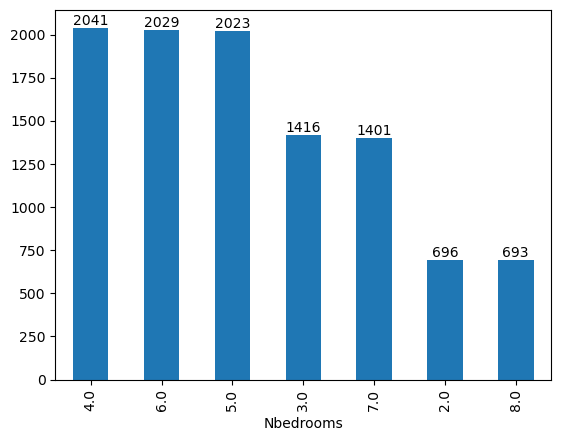

In [51]:
ax=combine_df.Nbedrooms.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: title={'center': 'Number Of washrooms for Bedrooms'}, ylabel='count'>

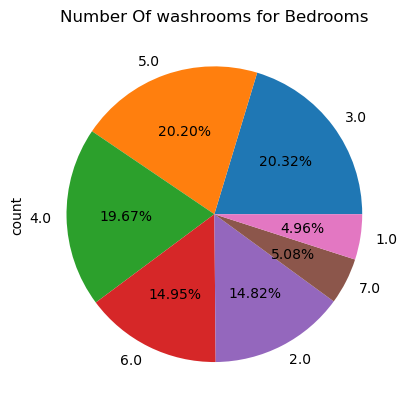

In [52]:
plt.title('Number Of washrooms for Bedrooms')
combine_df.Nbwashrooms.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [53]:
pd.crosstab(combine_df.roof,combine_df.Grade)

Grade,A,B,C,D,E,Missing
roof,,,,,,
NO,206,790,1739,1447,26,1993
YES,236,685,1189,682,0,1306


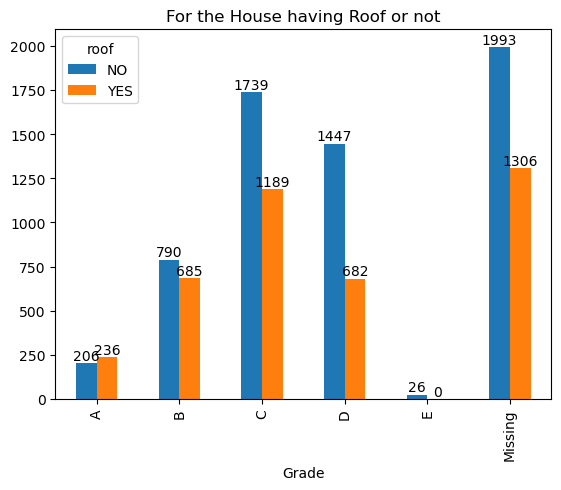

In [54]:
ax=pd.crosstab(combine_df.Grade,combine_df.roof).plot(kind='bar',title=('For the House having Roof or not'))
for i in ax.containers:
    ax.bar_label(i)

In [55]:
combine_df.EXPECTED.groupby(combine_df.Grade).mean()

Grade
A          4958.063348
B          4484.622373
C          4020.536202
D          3567.981212
E          3097.384615
Missing    4025.785693
Name: EXPECTED, dtype: float64

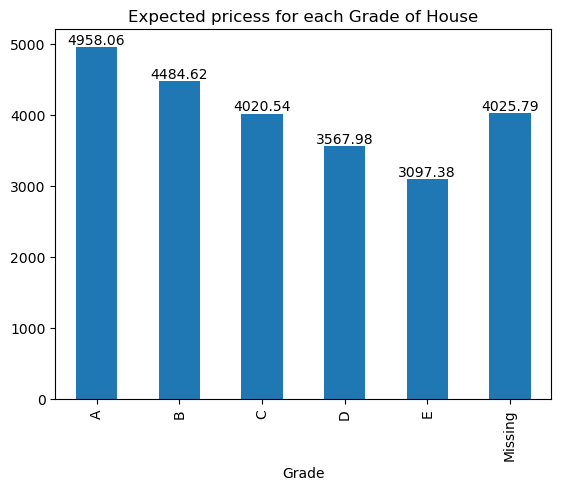

In [56]:
ax=combine_df.EXPECTED.groupby(combine_df.Grade).mean().plot(kind='bar',title='Expected pricess for each Grade of House')
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing

In [57]:
combine_df.Troom.groupby(combine_df.roof).mean()

roof
NO     7.015804
YES    6.983895
Name: Troom, dtype: float64

In [58]:
combine_df.Troom.groupby(combine_df.roof).var()

roof
NO     2.019105
YES    2.013409
Name: Troom, dtype: float64

In [59]:
yes=combine_df[combine_df.roof=='YES']
no=combine_df[combine_df.roof=='NO']

In [60]:
from scipy.stats import ttest_ind

In [61]:
ttest_ind(yes.Troom,no.Troom,equal_var=False)
# since pvalue=0.26427411516915633 os greater than 0.05, Fail to reject null Hypothesi
# alternative hypothesis is true, there is no significance difference between average Troom and roof

TtestResult(statistic=-1.1164172809402495, pvalue=0.26427411516915633, df=8778.923866102614)

In [62]:
combine_df.Nfloors.groupby(combine_df.roof).mean()

roof
NO     4.510563
YES    4.505857
Name: Nfloors, dtype: float64

In [63]:
combine_df.Nfloors.groupby(combine_df.roof).var()

roof
NO     3.296380
YES    3.292253
Name: Nfloors, dtype: float64

In [64]:
ttest_ind(yes.Nfloors,no.Nfloors,equal_var=False)
# since pvalue=0.897512308975918 is greater than 0.05,fail to reject null hypothesis
# alternative hypothesis true,there is no significance dofference between average of Troom and Nfloors

TtestResult(statistic=-0.1288082761124077, pvalue=0.897512308975918, df=8774.130198530476)

In [65]:
from scipy.stats import chi2_contingency

In [66]:
chi2_contingency(pd.crosstab(combine_df.Grade,combine_df.roof))
# since pvalue=5.795534613231062e-27 is less than 0.05, reject null hypothesis
# There is no associatioon between average of Gradde and roof

Chi2ContingencyResult(statistic=132.89015878677472, pvalue=5.795534613231062e-27, dof=5, expected_freq=array([[ 266.12700262,  175.87299738],
       [ 888.09350422,  586.90649578],
       [1762.94086805, 1165.05913195],
       [1281.86513254,  847.13486746],
       [  15.65452957,   10.34547043],
       [1986.31896301, 1312.68103699]]))

<Figure size 3000x1500 with 0 Axes>

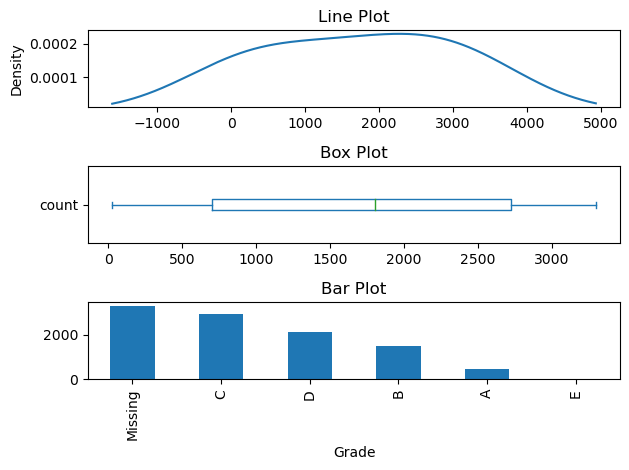

In [67]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)

combine_df.Grade.value_counts().plot(kind='kde',ax=ax[0])
combine_df.Grade.value_counts().plot(kind='box',vert=False,ax=ax[1])
combine_df.Grade.value_counts().plot(kind='bar',ax=ax[2])

# You can add titles or labels for each subplot if needed
ax[0].set_title('Line Plot')
ax[1].set_title('Box Plot')
ax[2].set_title('Bar Plot')

plt.tight_layout()  # Ensures the subplots are properly spaced
plt.show()

# Splitting the data into numeric columns and object columns

In [68]:
numcols=combine_df.select_dtypes(include=np.number)
objcols=combine_df.select_dtypes(include='object')

In [69]:
numcols.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,3.0,0.0,76.0,2,63.0,4,3826.0
1,344,6.0,7.0,7.0,8.0,0.0,83.0,7,97.0,1,4458.0
2,294,8.0,4.0,3.0,4.0,97.0,78.0,1,88.0,4,4199.0
3,328,5.0,4.0,2.0,4.0,0.0,91.0,5,86.0,1,3462.0
4,295,9.0,5.0,3.0,5.0,0.0,97.0,4,93.0,3,4543.0


In [70]:
objcols.head()

,roof,Grade
0,NO,D
1,NO,B
2,YES,C
3,NO,D
4,NO,C


In [71]:
objcols=pd.get_dummies(objcols,columns=['roof'])
objcols.head()

,Grade,roof_NO,roof_YES
0,D,True,False
1,B,True,False
2,C,False,True
3,D,True,False
4,C,True,False


In [72]:
numcols.corr()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
Area(total),1.000000,-0.002447,-0.001173,0.012384,0.008225,0.004469,0.006129,0.011474,-0.013373,0.000818,0.216077
Troom,-0.002447,1.000000,0.005330,0.008340,0.010329,-0.009619,0.006029,0.004661,0.017663,-0.002286,0.433728
Nbedrooms,-0.001173,0.005330,1.000000,0.774862,0.818462,0.005451,0.017917,0.679973,0.005231,0.009601,0.600504
Nbwashrooms,0.012384,0.008340,0.774862,1.000000,0.948639,0.001109,0.015014,0.702888,-0.001331,0.011414,0.587602
Twashrooms,0.008225,0.010329,0.818462,0.948639,1.000000,-0.001216,0.018157,0.742090,-0.001381,0.013098,0.604059
Roof(Area),0.004469,-0.009619,0.005451,0.001109,-0.001216,1.000000,0.015308,-0.001603,0.005133,-0.002222,0.128261
Lawn(Area),0.006129,0.006029,0.017917,0.015014,0.018157,0.015308,1.000000,0.022995,-0.007209,0.000879,0.068726
Nfloors,0.011474,0.004661,0.679973,0.702888,0.742090,-0.001603,0.022995,1.000000,0.002702,0.008982,0.575612
API,-0.013373,0.017663,0.005231,-0.001331,-0.001381,0.005133,-0.007209,0.002702,1.000000,0.012263,0.112338
ANB,0.000818,-0.002286,0.009601,0.011414,0.013098,-0.002222,0.000879,0.008982,0.012263,1.000000,0.028895


<Axes: >

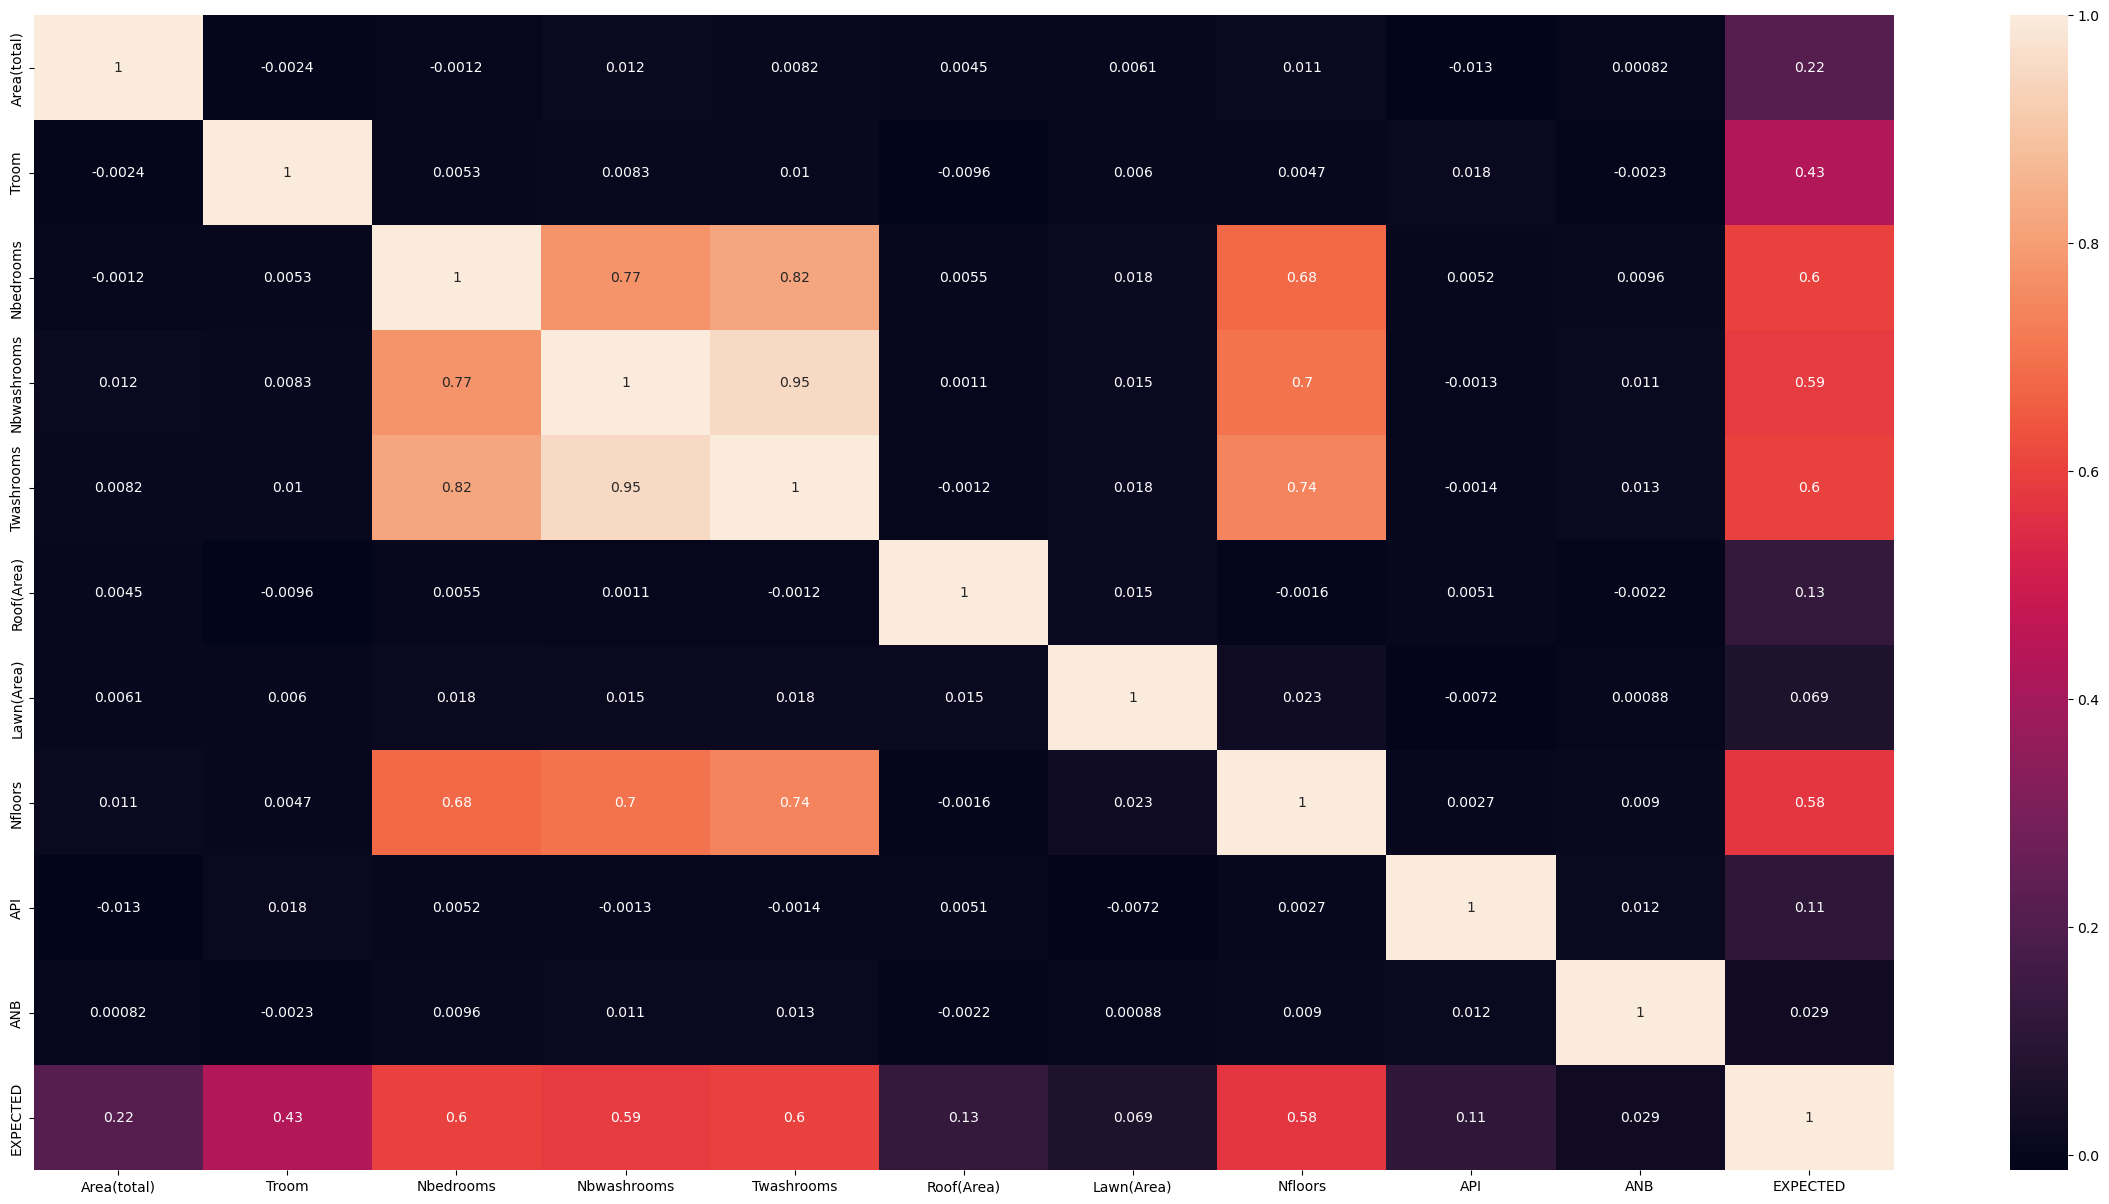

In [73]:
plt.figure(figsize=(30,15))
sns.heatmap(numcols.corr(),annot=True)

In [74]:
numcols=numcols.drop('Twashrooms',axis=1)

In [75]:
numcols.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,305,8.0,2.0,1.0,0.0,76.0,2,63.0,4,3826.0
1,344,6.0,7.0,7.0,0.0,83.0,7,97.0,1,4458.0
2,294,8.0,4.0,3.0,97.0,78.0,1,88.0,4,4199.0
3,328,5.0,4.0,2.0,0.0,91.0,5,86.0,1,3462.0
4,295,9.0,5.0,3.0,0.0,97.0,4,93.0,3,4543.0


# Standard Scaler

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()

In [78]:
numcols_scaled=sc.fit_transform(numcols)

In [79]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [80]:
numcols_scaled.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,-0.976671,0.701987,-1.821698,-1.900674,-0.797958,-1.185460,-1.382224,-1.354055,0.297617,-0.419853
1,0.927560,-0.706362,1.219486,1.894410,-0.797958,-0.593371,1.372648,1.518135,-1.468029,0.861792
2,-1.513762,0.701987,-0.605225,-0.635646,1.237577,-1.016292,-1.933198,0.757849,0.297617,0.336561
3,0.146337,-1.410537,-0.605225,-1.268160,-0.797958,0.083303,0.270699,0.588897,-1.468029,-1.158016
4,-1.464936,1.406161,0.003012,-0.635646,-0.797958,0.590808,-0.280275,1.180230,-0.290931,1.034165


C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: >

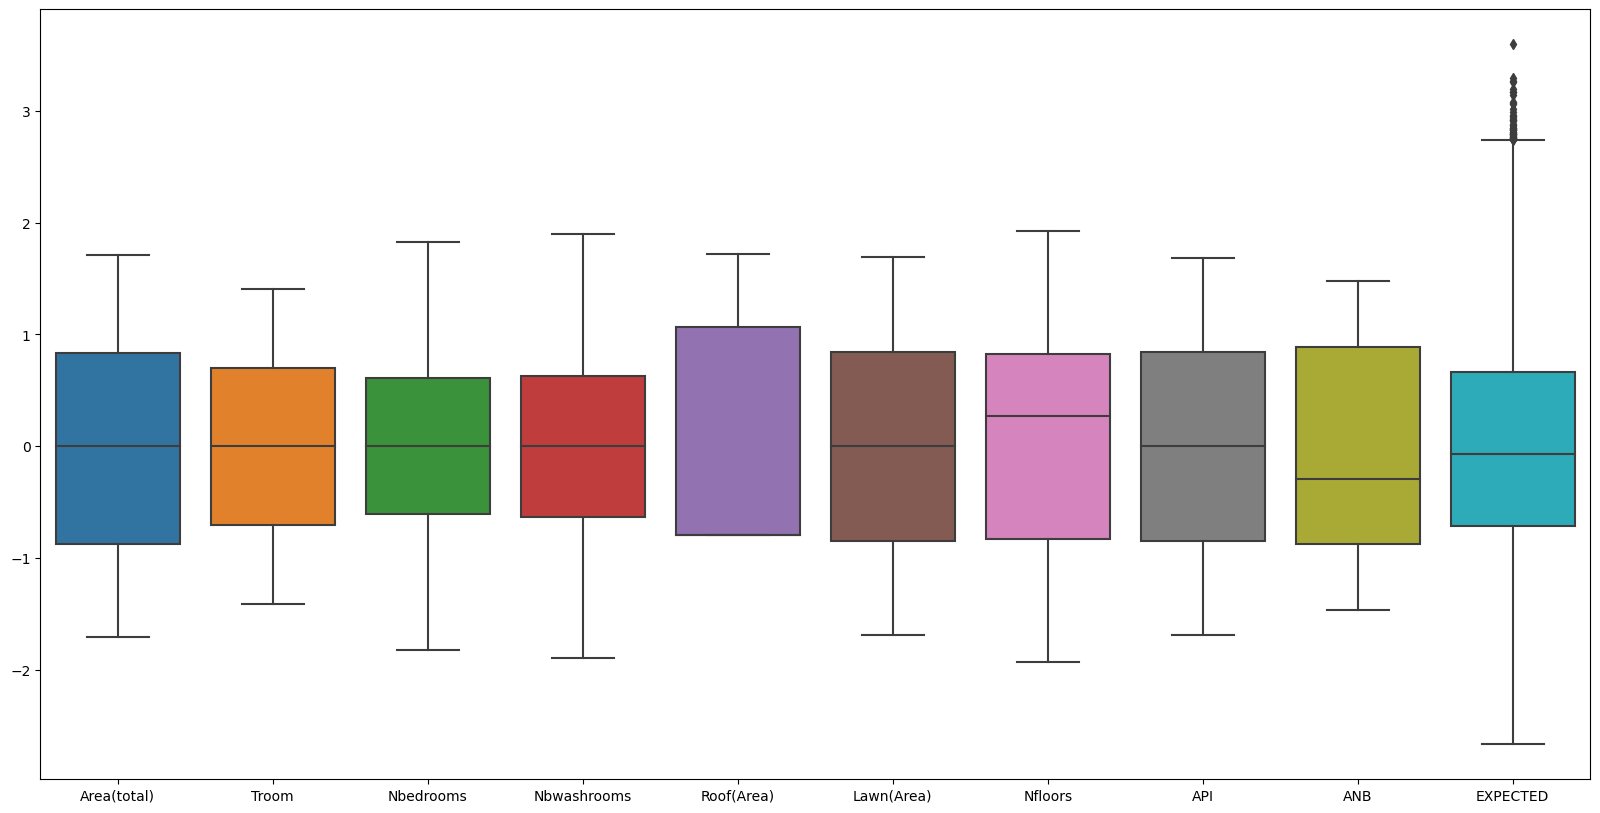

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols_scaled)

# Minmax Scaler

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
mm=MinMaxScaler()

In [84]:
numcols_mm=mm.fit_transform(numcols)

In [85]:
numcols_mm=pd.DataFrame(numcols_mm,columns=numcols.columns)

In [86]:
numcols_mm.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,0.214286,0.75,0.000000,0.000000,0.000000,0.150,0.142857,0.100,0.6,0.359016
1,0.771429,0.25,0.833333,1.000000,0.000000,0.325,0.857143,0.950,0.0,0.563613
2,0.057143,0.75,0.333333,0.333333,0.808333,0.200,0.000000,0.725,0.6,0.479767
3,0.542857,0.00,0.333333,0.166667,0.000000,0.525,0.571429,0.675,0.0,0.241178
4,0.071429,1.00,0.500000,0.333333,0.000000,0.675,0.428571,0.850,0.4,0.591130


C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: >

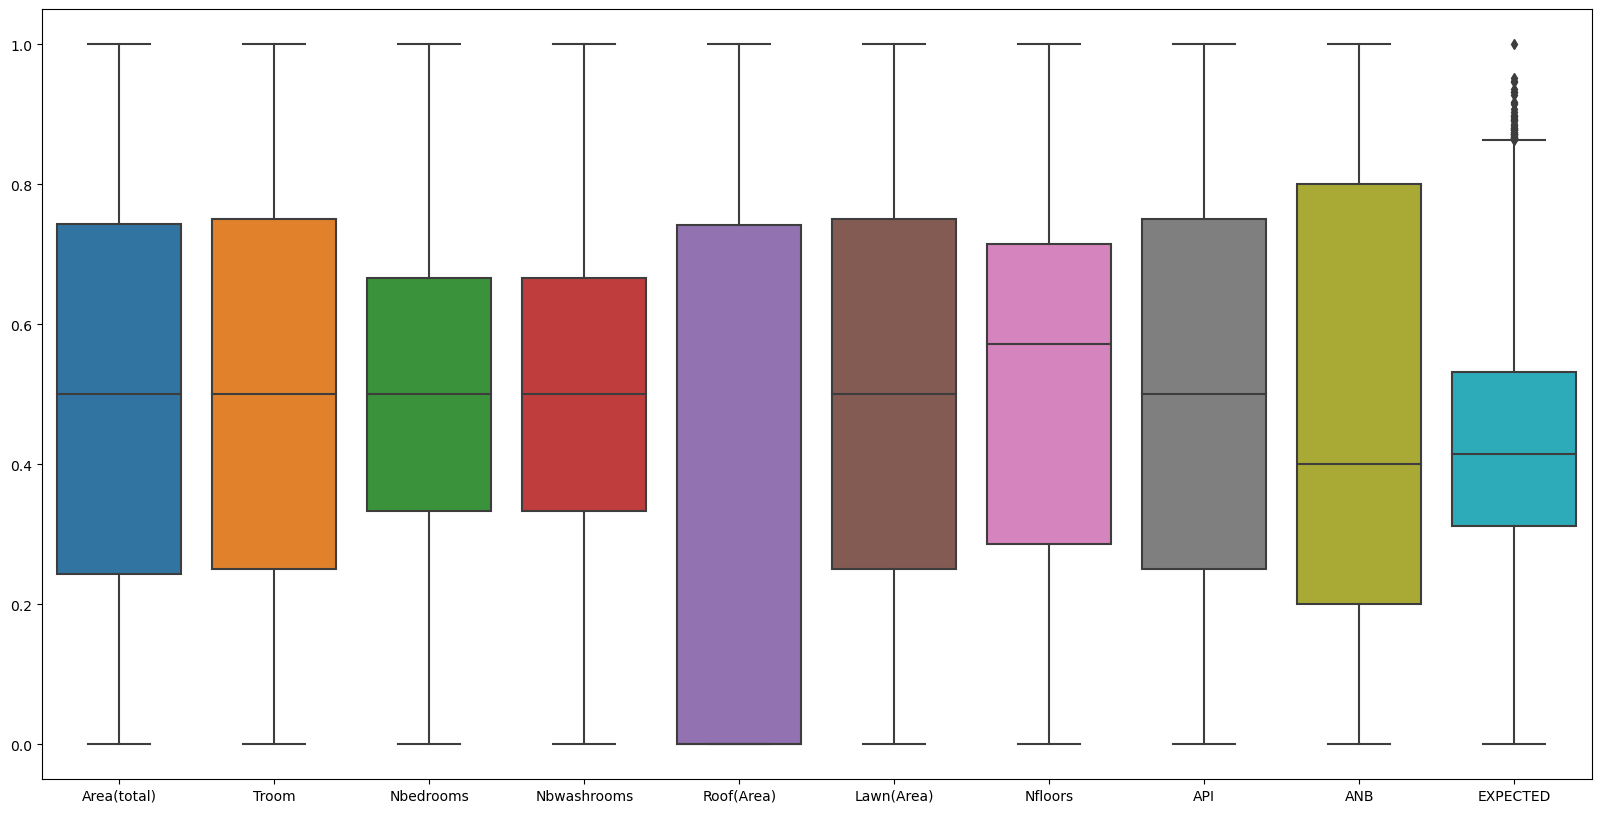

In [87]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols_mm)

# Robust scaler

In [88]:
from sklearn.preprocessing import RobustScaler

In [89]:
robust=RobustScaler()

In [90]:
numcols_robust=robust.fit_transform(numcols)

In [91]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [92]:
numcols_robust.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,-0.571429,0.5,-1.5,-1.5,0.000000,-0.70,-1.000000,-0.80,0.333333,-0.253852
1,0.542857,-0.5,1.0,1.5,0.000000,-0.35,0.666667,0.90,-0.666667,0.673514
2,-0.885714,0.5,-0.5,-0.5,1.089888,-0.60,-1.333333,0.45,0.333333,0.293470
3,0.085714,-1.0,-0.5,-1.0,0.000000,0.05,0.000000,0.35,-0.666667,-0.787968
4,-0.857143,1.0,0.0,-0.5,0.000000,0.35,-0.333333,0.70,0.000000,0.798239


C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

<Axes: >

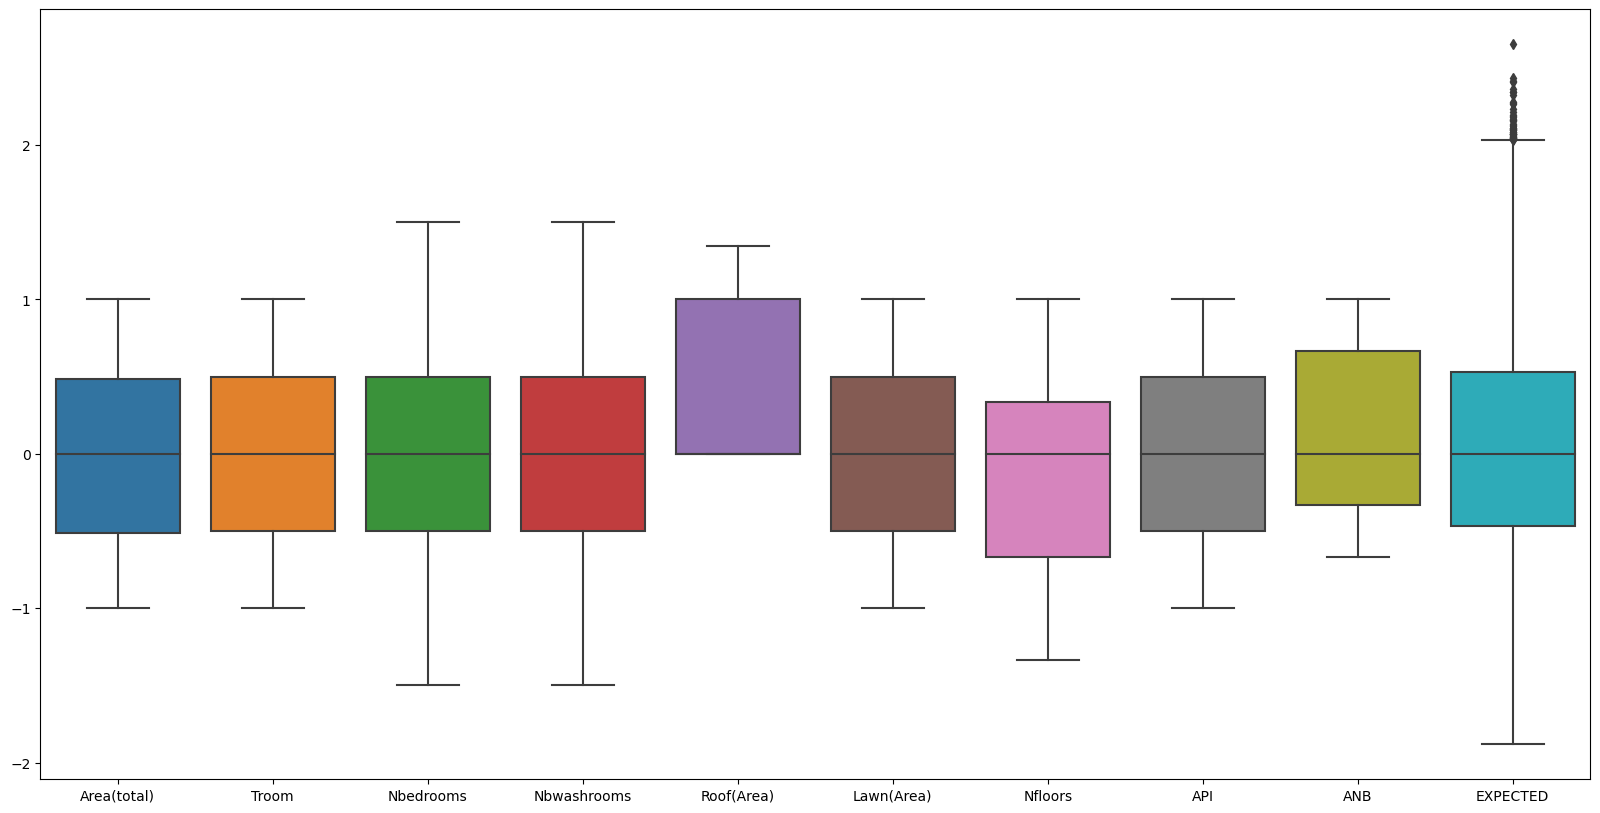

In [93]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols_robust)

In [94]:
numcols_mm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  float64
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Roof(Area)   10299 non-null  float64
 5   Lawn(Area)   10299 non-null  float64
 6   Nfloors      10299 non-null  float64
 7   API          10299 non-null  float64
 8   ANB          10299 non-null  float64
 9   EXPECTED     10299 non-null  float64
dtypes: float64(10)
memory usage: 804.7 KB


In [95]:
clean=pd.concat([numcols_mm,objcols],axis=1)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  10299 non-null  float64
 1   Troom        10299 non-null  float64
 2   Nbedrooms    10299 non-null  float64
 3   Nbwashrooms  10299 non-null  float64
 4   Roof(Area)   10299 non-null  float64
 5   Lawn(Area)   10299 non-null  float64
 6   Nfloors      10299 non-null  float64
 7   API          10299 non-null  float64
 8   ANB          10299 non-null  float64
 9   EXPECTED     10299 non-null  float64
 10  Grade        10299 non-null  object 
 11  roof_NO      10299 non-null  bool   
 12  roof_YES     10299 non-null  bool   
dtypes: bool(2), float64(10), object(1)
memory usage: 905.3+ KB


In [96]:
clean=clean.replace({True:1,False:0})

In [97]:
house_tr=clean[clean.Grade!='Missing']
house_tt=clean[clean.Grade=='Missing']

In [98]:
house_tr.tail()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade,roof_NO,roof_YES
6995,0.228571,0.75,0.000000,0.000000,0.000000,0.200,0.000000,0.350,0.8,0.323729,D,1,0
6996,0.728571,0.00,0.166667,0.166667,0.833333,0.050,0.428571,0.425,0.6,0.201360,D,0,1
6997,0.228571,0.25,0.333333,0.166667,0.691667,0.250,0.428571,0.925,0.6,0.359987,D,0,1
6998,0.685714,0.75,0.833333,0.833333,0.000000,0.625,0.428571,0.625,0.0,0.573325,B,1,0
6999,0.342857,0.00,0.666667,0.500000,0.908333,0.250,0.428571,0.925,0.2,0.226934,C,0,1


In [99]:
house_tt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 7000 to 10298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  3299 non-null   float64
 1   Troom        3299 non-null   float64
 2   Nbedrooms    3299 non-null   float64
 3   Nbwashrooms  3299 non-null   float64
 4   Roof(Area)   3299 non-null   float64
 5   Lawn(Area)   3299 non-null   float64
 6   Nfloors      3299 non-null   float64
 7   API          3299 non-null   float64
 8   ANB          3299 non-null   float64
 9   EXPECTED     3299 non-null   float64
 10  Grade        3299 non-null   object 
 11  roof_NO      3299 non-null   int64  
 12  roof_YES     3299 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 360.8+ KB


In [100]:
house_tt=house_tt.drop('Grade',axis=1)
house_tt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 7000 to 10298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  3299 non-null   float64
 1   Troom        3299 non-null   float64
 2   Nbedrooms    3299 non-null   float64
 3   Nbwashrooms  3299 non-null   float64
 4   Roof(Area)   3299 non-null   float64
 5   Lawn(Area)   3299 non-null   float64
 6   Nfloors      3299 non-null   float64
 7   API          3299 non-null   float64
 8   ANB          3299 non-null   float64
 9   EXPECTED     3299 non-null   float64
 10  roof_NO      3299 non-null   int64  
 11  roof_YES     3299 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 335.1 KB


# Label Encoding for dependent variable

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le=LabelEncoder()

In [103]:
house_tr.Grade=le.fit_transform(house_tr.Grade)

C:\Users\Eswar Aditya\AppData\Local\Temp\ipykernel_17516\2582383736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_tr.Grade=le.fit_transform(house_tr.Grade)


In [104]:
house_tr.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade,roof_NO,roof_YES
0,0.214286,0.75,0.000000,0.000000,0.000000,0.150,0.142857,0.100,0.6,0.359016,3,1,0
1,0.771429,0.25,0.833333,1.000000,0.000000,0.325,0.857143,0.950,0.0,0.563613,1,1,0
2,0.057143,0.75,0.333333,0.333333,0.808333,0.200,0.000000,0.725,0.6,0.479767,2,0,1
3,0.542857,0.00,0.333333,0.166667,0.000000,0.525,0.571429,0.675,0.0,0.241178,3,1,0
4,0.071429,1.00,0.500000,0.333333,0.000000,0.675,0.428571,0.850,0.4,0.591130,2,1,0


# Splitting the data into Dependent(y) and Independent variables(X's)

In [105]:
X=house_tr.drop('Grade',axis=1)
y=house_tr.Grade

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  7000 non-null   float64
 1   Troom        7000 non-null   float64
 2   Nbedrooms    7000 non-null   float64
 3   Nbwashrooms  7000 non-null   float64
 4   Roof(Area)   7000 non-null   float64
 5   Lawn(Area)   7000 non-null   float64
 6   Nfloors      7000 non-null   float64
 7   API          7000 non-null   float64
 8   ANB          7000 non-null   float64
 9   EXPECTED     7000 non-null   float64
 10  roof_NO      7000 non-null   int64  
 11  roof_YES     7000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 710.9 KB


In [107]:
y.head()

0    3
1    1
2    2
3    3
4    2
Name: Grade, dtype: int32

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
reg=LogisticRegression(max_iter=1000)

In [110]:
regmodel=reg.fit(X,y)

In [111]:
regmodel.score(X,y)

0.869

In [112]:
repredict=regmodel.predict(X)

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [114]:
cross_val_score(reg,X,y)

array([0.87      , 0.87071429, 0.86071429, 0.86642857, 0.86571429])

In [115]:
np.mean([0.87      , 0.87071429, 0.86071429, 0.86642857, 0.86571429])

0.866714288

In [116]:
print(classification_report(y,repredict))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       442
           1       0.84      0.84      0.84      1475
           2       0.85      0.89      0.87      2928
           3       0.90      0.88      0.89      2129
           4       0.00      0.00      0.00        26

    accuracy                           0.87      7000
   macro avg       0.71      0.68      0.69      7000
weighted avg       0.87      0.87      0.87      7000



C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
predict_test=regmodel.predict(house_tt)

In [118]:
predict_test=pd.DataFrame(predict_test)

In [119]:
predict_test=predict_test.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [120]:
predict_test.value_counts()

C    1475
D     992
B     688
A     144
Name: count, dtype: int64

In [121]:
predict_test.to_csv('regpred.csv')

# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
tree=DecisionTreeClassifier(max_depth=10)

In [124]:
treemodel=tree.fit(X,y)

In [125]:
treemodel.score(X,y)

0.9215714285714286

In [126]:
treepredict=treemodel.predict(X)

In [127]:
pd.crosstab(y,treepredict)

col_0,0,1,2,3,4
Grade,,,,,
0,381,61,0,0,0
1,20,1315,140,0,0
2,0,91,2711,126,0
3,0,1,101,2024,3
4,0,0,0,6,20


In [128]:
cross_val_score(tree,X,y)

array([0.80714286, 0.77285714, 0.78      , 0.79285714, 0.79357143])

In [129]:
np.mean([0.80571429, 0.77142857, 0.78142857, 0.79142857, 0.80071429])

0.7901428580000001

In [130]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       442
           1       0.90      0.89      0.89      1475
           2       0.92      0.93      0.92      2928
           3       0.94      0.95      0.94      2129
           4       0.87      0.77      0.82        26

    accuracy                           0.92      7000
   macro avg       0.91      0.88      0.90      7000
weighted avg       0.92      0.92      0.92      7000



In [131]:
tree_testpredict=treemodel.predict(house_tt)

In [132]:
tree_testpredict=pd.DataFrame(tree_testpredict)

In [133]:
tree_testpredict.value_counts()

2    1387
3    1062
1     680
0     159
4      11
Name: count, dtype: int64

In [134]:
tree_testpredict=tree_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [135]:
tree_testpredict.to_csv('tree.csv')

# Random forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf=RandomForestClassifier(max_depth=15,n_estimators=300,min_samples_leaf=5)

In [138]:
rfmodel=rf.fit(X,y)

In [139]:
rfmodel.score(X,y)

0.9374285714285714

In [140]:
rfpredict=rfmodel.predict(X)

In [141]:
pd.crosstab(y,rfpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,371,71,0,0,0
1,10,1353,112,0,0
2,0,34,2826,68,0
3,0,0,126,2002,1
4,0,0,0,16,10


In [142]:
cross_val_score(rf,X,y)

array([0.85714286, 0.845     , 0.84571429, 0.86642857, 0.87357143])

In [143]:
np.mean([0.86      , 0.84214286, 0.84428571, 0.87357143, 0.86714286])

0.8574285719999999

In [144]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       442
           1       0.93      0.92      0.92      1475
           2       0.92      0.97      0.94      2928
           3       0.96      0.94      0.95      2129
           4       0.91      0.38      0.54        26

    accuracy                           0.94      7000
   macro avg       0.94      0.81      0.85      7000
weighted avg       0.94      0.94      0.94      7000



In [145]:
rf_testpredict=rfmodel.predict(house_tt)

In [146]:
rf_testpredict=pd.DataFrame(rf_testpredict)

In [147]:
rf_testpredict.value_counts()

2    1469
3    1009
1     683
0     137
4       1
Name: count, dtype: int64

In [148]:
rf_testpredict=rf_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [149]:
rf_testpredict.value_counts()

C    1469
D    1009
B     683
A     137
E       1
Name: count, dtype: int64

In [150]:
rf_testpredict.to_csv('rf_test.csv')

# GBM

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
gbm=GradientBoostingClassifier(max_depth=3,n_estimators=170)

In [153]:
gbmmodel=gbm.fit(X,y)

In [154]:
gbmmodel.score(X,y)

0.9445714285714286

In [155]:
gbmpredict=gbm.predict(X)

In [156]:
pd.crosstab(y,gbmpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,415,27,0,0,0
1,4,1377,94,0,0
2,0,49,2787,92,0
3,0,0,122,2007,0
4,0,0,0,0,26


In [157]:
cross_val_score(gbm,X,y)

array([0.89      , 0.89142857, 0.86714286, 0.88071429, 0.88142857])

In [158]:
np.mean([0.89      , 0.89142857, 0.86714286, 0.88071429, 0.88142857])

0.8821428579999999

In [159]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       442
           1       0.95      0.93      0.94      1475
           2       0.93      0.95      0.94      2928
           3       0.96      0.94      0.95      2129
           4       1.00      1.00      1.00        26

    accuracy                           0.94      7000
   macro avg       0.96      0.95      0.96      7000
weighted avg       0.94      0.94      0.94      7000



In [160]:
gbm_testpredict=gbmmodel.predict(house_tt)

In [161]:
gbm_testpredict=pd.DataFrame(gbm_testpredict)

In [162]:
gbm_testpredict.value_counts()

2    1445
3    1010
1     682
0     154
4       8
Name: count, dtype: int64

In [163]:
gbm_testpredict=gbm_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [164]:
gbm_testpredict.to_csv('gbm.csv')

# SVC

In [165]:
from sklearn.svm import SVC

In [166]:
svc=SVC(C=5)

In [167]:
svcmodel=svc.fit(X,y)

In [168]:
svcmodel.score(X,y)

0.9272857142857143

In [169]:
svcpredict=svc.predict(X)

In [170]:
pd.crosstab(y,svcpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,397,45,0,0,0
1,20,1334,121,0,0
2,0,72,2737,119,0
3,0,0,117,2008,4
4,0,0,0,11,15


In [171]:
cross_val_score(svc,X,y)

array([0.9       , 0.90428571, 0.88785714, 0.89428571, 0.89642857])

In [172]:
np.mean([0.9       , 0.90428571, 0.88785714, 0.89428571, 0.89642857])

0.8965714260000001

In [173]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       442
           1       0.92      0.90      0.91      1475
           2       0.92      0.93      0.93      2928
           3       0.94      0.94      0.94      2129
           4       0.79      0.58      0.67        26

    accuracy                           0.93      7000
   macro avg       0.90      0.85      0.87      7000
weighted avg       0.93      0.93      0.93      7000



In [174]:
svc_testpredict=svc.predict(house_tt)

In [175]:
svc_testpredict=pd.DataFrame(svc_testpredict)

In [176]:
svc_testpredict.value_counts()

2    1410
3    1044
1     675
0     162
4       8
Name: count, dtype: int64

In [177]:
svc_testpredict=svc_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [178]:
svc_testpredict.to_csv('svc.csv')

# KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knc=KNeighborsClassifier(n_neighbors=2)

In [181]:
kncmodel=knc.fit(X,y)

In [182]:
kncmodel.score(X,y)

0.8987142857142857

In [183]:
kncpredict=kncmodel.predict(X)

In [184]:
pd.crosstab(y,kncpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,442,0,0,0,0
1,117,1358,0,0,0
2,0,260,2668,0,0
3,0,0,316,1813,0
4,0,0,0,16,10


In [185]:
cross_val_score(knc,X,y)

array([0.74714286, 0.76285714, 0.75857143, 0.76357143, 0.74857143])

In [186]:
np.mean([0.74714286, 0.76285714, 0.75857143, 0.76357143, 0.74857143])

0.7561428580000001

In [187]:
print(classification_report(y,kncpredict))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       442
           1       0.84      0.92      0.88      1475
           2       0.89      0.91      0.90      2928
           3       0.99      0.85      0.92      2129
           4       1.00      0.38      0.56        26

    accuracy                           0.90      7000
   macro avg       0.90      0.81      0.83      7000
weighted avg       0.91      0.90      0.90      7000



In [188]:
kncpredict_test=knc.predict(house_tt)

In [189]:
kncpredict_test=pd.DataFrame(kncpredict_test)

In [190]:
kncpredict_test.value_counts()

2    1427
3     824
1     795
0     248
4       5
Name: count, dtype: int64

In [191]:
kncpredict_test=kncpredict_test.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [192]:
kncpredict_test.to_csv('knc.csv')

# GaussianNB

In [193]:
from sklearn.naive_bayes import GaussianNB

In [194]:
gb=GaussianNB()

In [195]:
gbmodel=gb.fit(X,y)

In [196]:
gbmodel.score(X,y)

0.6542857142857142

In [197]:
gbpredict=gbmodel.predict(X)

In [198]:
pd.crosstab(y,gbpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,334,108,0,0,0
1,104,1127,244,0,0
2,0,434,2215,244,35
3,0,0,320,878,931
4,0,0,0,0,26


In [199]:
cross_val_score(gb,X,y)

array([0.63214286, 0.665     , 0.63785714, 0.65357143, 0.67642857])

In [200]:
np.mean([0.63214286, 0.665     , 0.63785714, 0.65357143, 0.67642857])

0.653

In [201]:
print(classification_report(y,gbpredict))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       442
           1       0.68      0.76      0.72      1475
           2       0.80      0.76      0.78      2928
           3       0.78      0.41      0.54      2129
           4       0.03      1.00      0.05        26

    accuracy                           0.65      7000
   macro avg       0.61      0.74      0.57      7000
weighted avg       0.76      0.65      0.69      7000



In [202]:
gb_testpredict=gb.predict(house_tt)

In [203]:
gb_testpredict=pd.DataFrame(gb_testpredict)

In [204]:
gb_testpredict.value_counts()

2    1312
1     776
3     554
4     476
0     181
Name: count, dtype: int64

In [205]:
gb_testpredict=gb_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [206]:
gb_testpredict.value_counts()

C    1312
B     776
D     554
E     476
A     181
Name: count, dtype: int64

In [207]:
gb_testpredict.to_csv('gb.csv')

# Grid search cv

In [208]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [209]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [210]:
rf= RandomForestClassifier(random_state=42)
random_search = GridSearchCV(estimator=rf, param_grid=param_dist, cv=3, n_jobs=-1)
random_search.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [211]:
random_search.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [212]:
rf=RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)

In [213]:
rfmodel=rf.fit(X,y)

In [214]:
rfmodel.score(X,y)

0.9242857142857143

In [215]:
rfpredict=rfmodel.predict(X)

In [216]:
pd.crosstab(y,rfpredict)

col_0,0,1,2,3,4
Grade,,,,,
0,359,83,0,0,0
1,1,1340,134,0,0
2,0,43,2795,90,0
3,0,0,163,1966,0
4,0,0,0,16,10


In [217]:
cross_val_score(rf,X,y)

array([0.855     , 0.83714286, 0.83714286, 0.86071429, 0.86642857])

In [218]:
np.mean([0.84571429, 0.83357143, 0.83571429, 0.86142857, 0.86357143])

0.848000002

In [219]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       442
           1       0.91      0.91      0.91      1475
           2       0.90      0.95      0.93      2928
           3       0.95      0.92      0.94      2129
           4       1.00      0.38      0.56        26

    accuracy                           0.92      7000
   macro avg       0.95      0.80      0.85      7000
weighted avg       0.93      0.92      0.92      7000



In [220]:
rf_testpredict=rfmodel.predict(house_tt)

In [221]:
rf_testpredict=pd.DataFrame(rf_testpredict)

In [222]:
rf_testpredict.value_counts()

2    1487
3     994
1     700
0     117
4       1
Name: count, dtype: int64

In [223]:
rf_testpredict=rf_testpredict.replace({0:'A',1:'B',2:'C',3:'D',4:'E'})

In [224]:
rf_testpredict.value_counts()

C    1487
D     994
B     700
A     117
E       1
Name: count, dtype: int64

In [225]:
rf_testpredict.to_csv('rf_testcv.csv')

# Random Search CV

In [226]:
param_dist = {'min_samples_leaf':1, 'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [227]:
tree=DecisionTreeClassifier()
random_search = GridSearchCV(estimator=tree, param_grid=param_dist, cv=3, n_jobs=-1)
random_search.fit(X,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [228]:
random_search.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=5)

In [229]:
rf= RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [230]:
random_search.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)